In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
deliveries = pd.read_csv('deliveries.csv')
matches = pd.read_csv('matches.csv')
sns.set(style="whitegrid")

In [6]:
df = pd.merge(deliveries, matches, left_on='match_id', right_on='id')

In [7]:
# . Runs Scored by Batsman
batsman_runs = df.groupby('batter')['batsman_runs'].sum().reset_index()
batsman_runs = batsman_runs.sort_values(by='batsman_runs', ascending=False)
print(batsman_runs)

           batter  batsman_runs
631       V Kohli          8014
512      S Dhawan          6769
477     RG Sharma          6630
147     DA Warner          6567
546      SK Raina          5536
..            ...           ...
517       S Ladda             0
518  S Lamichhane             0
69   Abdur Razzak             0
565   SS Cottrell             0
290       KM Asif             0

[673 rows x 2 columns]


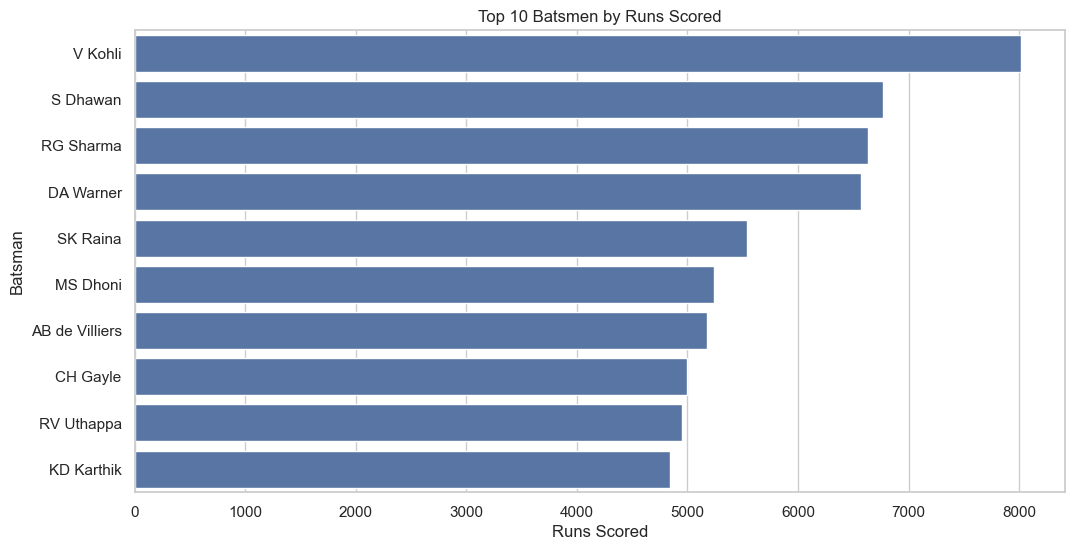

In [8]:
plt.figure(figsize=(12, 6))
sns.barplot(x='batsman_runs', y='batter', data=batsman_runs.head(10))  # Top 10
plt.title('Top 10 Batsmen by Runs Scored')
plt.xlabel('Runs Scored')
plt.ylabel('Batsman')
plt.show()

In [9]:
# Wickets Taken by Bowler
bowler_wickets = df.groupby('bowler')['player_dismissed'].count().reset_index()
bowler_wickets = bowler_wickets.sort_values(by='player_dismissed', ascending=False)
print(bowler_wickets)


            bowler  player_dismissed
524      YS Chahal               213
119       DJ Bravo               207
348      PP Chawla               201
446      SP Narine               200
355       R Ashwin               198
..             ...               ...
97        CJ Green                 0
324     Naman Dhir                 0
139   F du Plessis                 0
320    NL McCullum                 0
100  CK Kapugedera                 0

[530 rows x 2 columns]


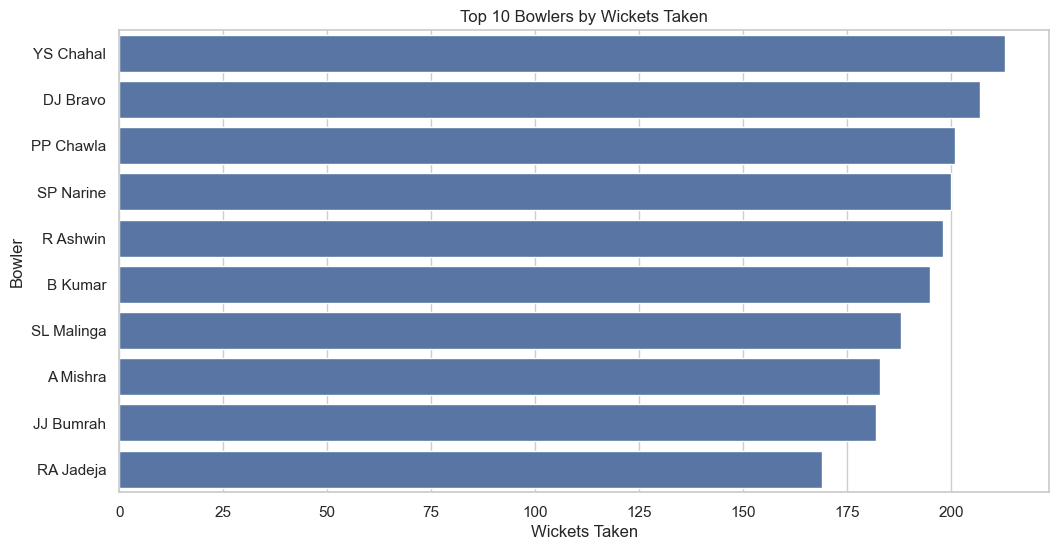

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(x='player_dismissed', y='bowler', data=bowler_wickets.head(10))  # Top 10
plt.title('Top 10 Bowlers by Wickets Taken')
plt.xlabel('Wickets Taken')
plt.ylabel('Bowler')
plt.show()

In [11]:
#  Strike Rate of Batsmen (Min. 100 balls faced)
balls_faced = df.groupby('batter')['ball'].count().reset_index()
batsman_strike_rate = pd.merge(batsman_runs, balls_faced, on='batter')
batsman_strike_rate['strike_rate'] = (batsman_strike_rate['batsman_runs'] / batsman_strike_rate['ball']) * 100
batsman_strike_rate = batsman_strike_rate[batsman_strike_rate['ball'] >= 100]  # Filter for those who faced at least 100 balls
batsman_strike_rate = batsman_strike_rate.sort_values(by='strike_rate', ascending=False)
print(batsman_strike_rate)

              batter  batsman_runs  ball  strike_rate
177  J Fraser-McGurk           330   150   220.000000
213         WG Jacks           230   133   172.932331
127          PD Salt           653   385   169.610390
157         T Stubbs           405   239   169.456067
114          TM Head           772   458   168.558952
..               ...           ...   ...          ...
290           Z Khan           117   141    82.978723
307      CJ Ferguson            98   119    82.352941
236    Kuldeep Yadav           183   224    81.696429
334         IR Jaggi            76   100    76.000000
313       RT Ponting            91   129    70.542636

[300 rows x 4 columns]


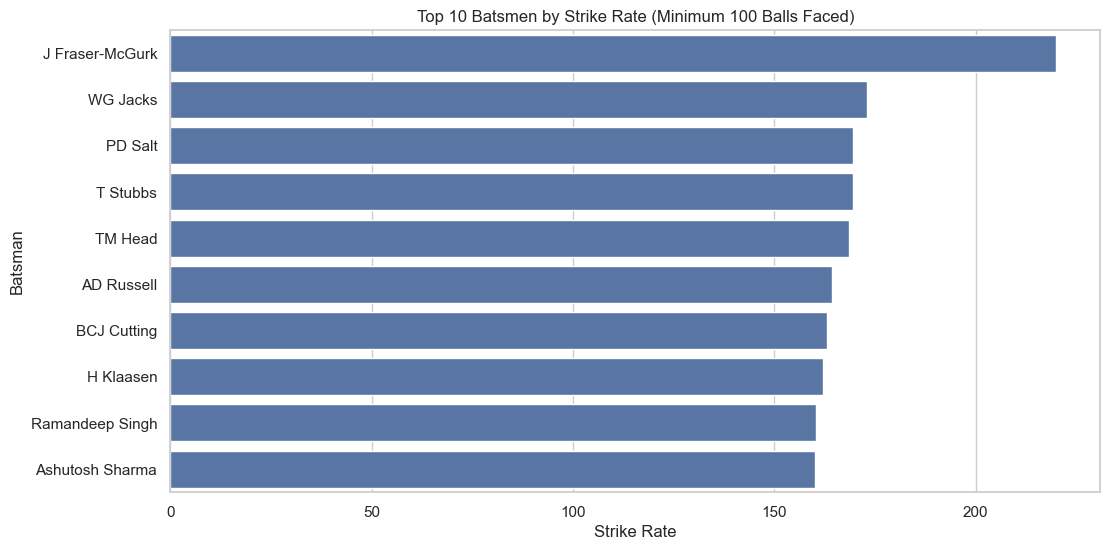

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(x='strike_rate', y='batter', data=batsman_strike_rate.head(10))  # Top 10
plt.title('Top 10 Batsmen by Strike Rate (Minimum 100 Balls Faced)')
plt.xlabel('Strike Rate')
plt.ylabel('Batsman')
plt.show()


In [13]:
# Dot Ball Percentage (Bowlers)
total_balls_bowled = df.groupby('bowler')['ball'].count().reset_index()
dot_balls_bowled = df[df['total_runs'] == 0].groupby('bowler')['ball'].count().reset_index()
bowler_dot_percentage = pd.merge(total_balls_bowled, dot_balls_bowled, on='bowler', suffixes=('_total', '_dot'))
bowler_dot_percentage['dot_percentage'] = (bowler_dot_percentage['ball_dot'] / bowler_dot_percentage['ball_total']) * 100
bowler_dot_percentage = bowler_dot_percentage.sort_values('dot_percentage', ascending=False)
print(bowler_dot_percentage)

            bowler  ball_total  ball_dot  dot_percentage
24    AC Gilchrist           1         1      100.000000
441        SS Iyer           6         4       66.666667
442      SS Mundhe           7         4       57.142857
240  LA Carseldine           7         4       57.142857
121  DJ Muthuswami          84        44       52.380952
..             ...         ...       ...             ...
184        JE Root          12         1        8.333333
138       FY Fazal          12         1        8.333333
290  Mandeep Singh          12         1        8.333333
154       H Sharma          30         2        6.666667
387       RW Price          18         1        5.555556

[517 rows x 4 columns]


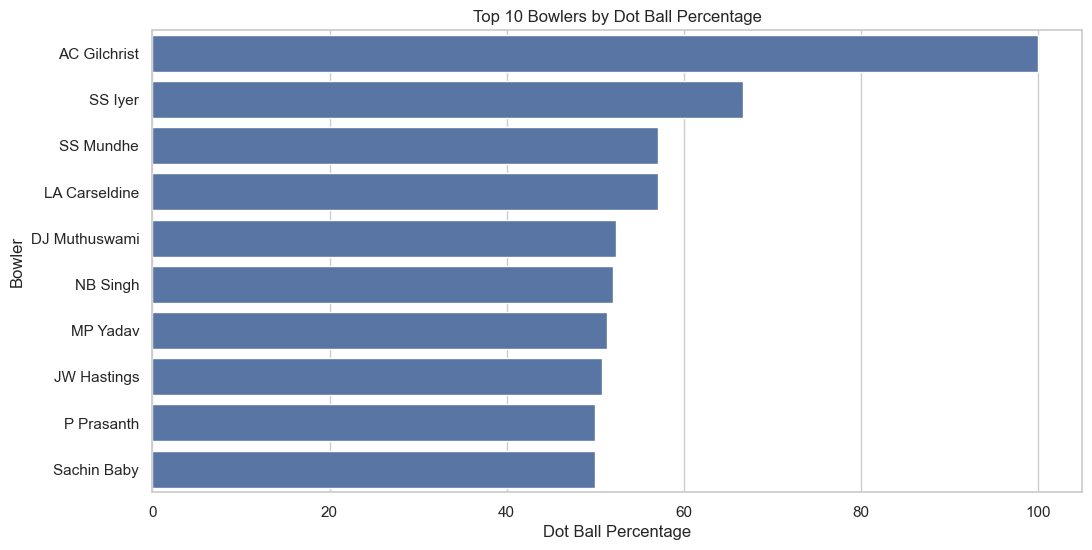

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(x='dot_percentage', y='bowler', data=bowler_dot_percentage.head(10))
plt.title('Top 10 Bowlers by Dot Ball Percentage')
plt.xlabel('Dot Ball Percentage')
plt.ylabel('Bowler')
plt.show()